## Model  11 - with Qulity of life data (728 observations!!)

### Target:
+ life_ladder  

### Features from Happiness:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+
+ perception of corruption
+ positive affect
+ negative affect

### Features from Quality:
+ purchasing_power_index


import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
sns.set_style("darkgrid")

model_name = 'model_11'

function section

In [3]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_and_quality_life_combined.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year_x                            728 non-null    int64  
 1   country_name                      728 non-null    object 
 2   life_ladder                       728 non-null    float64
 3   quality_of_life_index             728 non-null    float64
 4   purchasing_power_index            728 non-null    float64
 5   crime_index                       728 non-null    float64
 6   health_care_index                 728 non-null    float64
 7   cost_of_living_index              728 non-null    float64
 8   pollution_index                   728 non-null    float64
 9   log_gdp_per_capita                728 non-null    float64
 10  social_support                    728 non-null    float64
 11  healthy_life_expectancy_at_birth  728 non-null    float64
 12  freedom_

Define features and Target:

In [6]:
df.columns

Index(['year_x', 'country_name', 'life_ladder', 'quality_of_life_index',
       'purchasing_power_index', 'crime_index', 'health_care_index',
       'cost_of_living_index', 'pollution_index', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect'],
      dtype='object')

In [7]:
features = ['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth',
                  'perceptions_of_corruption', 'positive_affect', 'negative_affect',
                  'purchasing_power_index']

X = df[features]
y = df['life_ladder']

In [8]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect', 'purchasing_power_index'],
      dtype='object')

In [9]:
print(X.shape, y.shape)

(728, 7) (728,)


Train-Test-Split:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(509, 7) (219, 7) (509,) (219,)


In [12]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,perceptions_of_corruption,positive_affect,negative_affect,purchasing_power_index
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,10.161417,0.864827,67.711817,0.707002,0.670613,0.263079,65.734578
std,0.698737,0.094127,4.083153,0.225200,0.104109,0.070758,30.699457
min,7.602000,0.404000,50.500000,0.047000,0.297000,0.111000,3.300000
25%,9.645000,0.828000,65.775000,0.582000,0.597000,0.206000,38.900000
50%,10.300000,0.897000,68.350000,0.788000,0.698000,0.253000,59.200000
75%,10.707000,0.927000,70.900000,0.878000,0.752000,0.307000,91.600000
max,11.660000,0.983000,74.350000,0.977000,0.884000,0.512000,178.700000


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [14]:
X_train_scaled.shape

(509, 7)

In [15]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

<Axes: xlabel='purchasing_power_index', ylabel='life_ladder'>

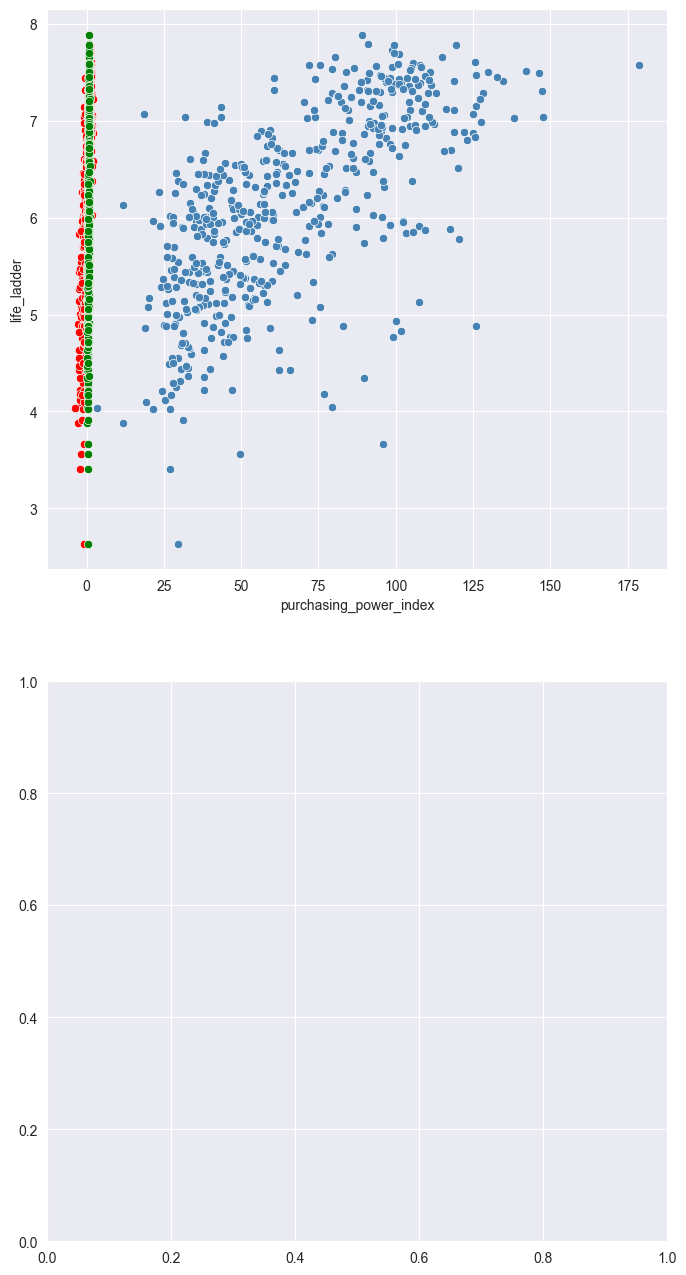

In [16]:
fig,ax = plt.subplots(2,1,figsize=(8,16))
sns.scatterplot(ax= ax[0], x = X_train.purchasing_power_index, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0], x = X_train_normalized[:,0], y = y_train, color = 'green')


Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [17]:
lin_reg_error_lst = []

for i in range(1,3):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_11_lin_reg_1,0.460,0.771,0.330,0.058,0.514,0.750,0.373,0.071,0.054,0.043,0.021
1,model_11_lin_reg_2,0.395,0.830,0.299,0.052,0.477,0.785,0.349,0.065,0.082,0.050,0.045


lin_reg_sc = LinearRegression()
lin_reg_sc.fit(X_train_scaled,y_train)

y_pred_linreg_test = lin_reg_sc.predict(X_test_normalized)
y_pred_linreg_train = lin_reg_sc.predict(X_train_normalized)

rmse_test = mean_squared_error(y_test, y_pred_linreg_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_linreg_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_linreg_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_linreg_train, X_train).round(3)

delta_rmse = abs(rmse_train - rmse_test)
delta_r2 = abs(r2_train - r2_test)

lin_reg_error_lst.append({'model_name': model_name + '_lin_reg_scaled', 
                        'train_rmse': rmse_train, 
                        'train_r2':r2_train, 
                        'test_rmse': rmse_test, 
                        'test_r2':r2_test,
                        'delta_RMSE':delta_rmse,
                        'delta_R2':delta_r2})

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_33310/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


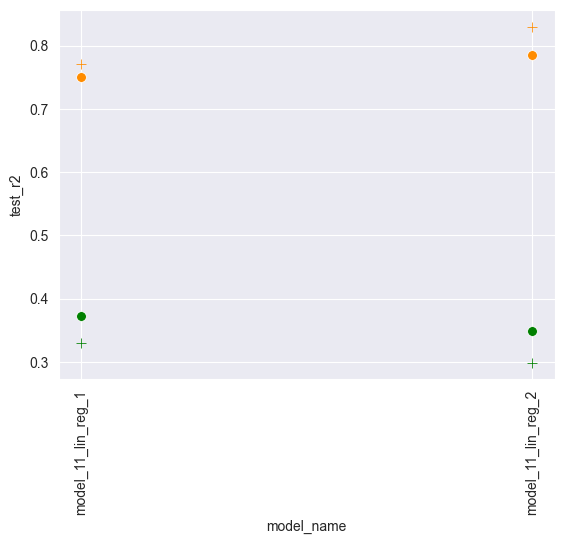

In [18]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [19]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_11_lin_reg_scaler_0,0.757
1,model_11_lin_reg_scaler_1,0.757
2,model_11_lin_reg_scaler_2,0.757


part df with the best models:

In [20]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
1,model_11_lin_reg_2,0.395,0.830,0.299,0.052,0.477,0.785,0.349,0.065,0.082,0.050,0.045
0,model_11_lin_reg_1,0.460,0.771,0.330,0.058,0.514,0.750,0.373,0.071,0.054,0.043,0.021


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [21]:
knn_error_lst = []
for metr in range(1,2):
    for neigh in np.arange(10,41,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
5,model_11_knn_1_35,0.450,0.780,0.331,0.060,0.537,0.727,0.381,0.075,0.087,0.050,0.053
6,model_11_knn_1_40,0.459,0.772,0.337,0.061,0.544,0.720,0.387,0.077,0.085,0.050,0.052
4,model_11_knn_1_30,0.438,0.792,0.323,0.058,0.529,0.735,0.375,0.074,0.091,0.052,0.057
3,model_11_knn_1_25,0.424,0.805,0.311,0.056,0.519,0.745,0.368,0.073,0.095,0.057,0.060
2,model_11_knn_1_20,0.407,0.820,0.298,0.054,0.507,0.757,0.361,0.071,0.100,0.063,0.063
1,model_11_knn_1_15,0.385,0.839,0.283,0.051,0.490,0.773,0.352,0.069,0.105,0.069,0.066
0,model_11_knn_1_10,0.352,0.865,0.256,0.046,0.465,0.796,0.332,0.065,0.113,0.076,0.069


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_33310/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


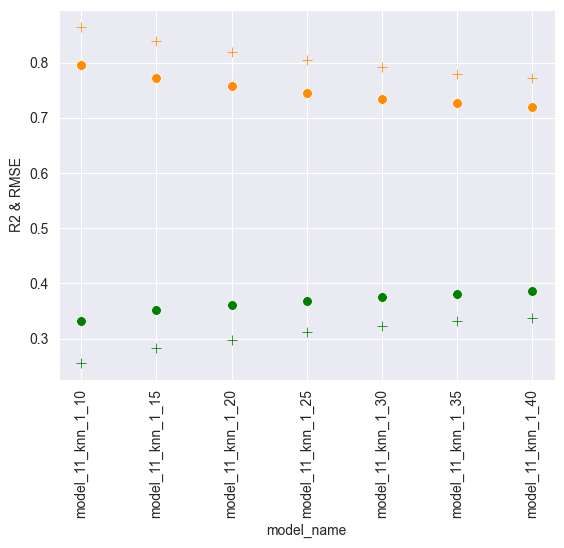

In [22]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [23]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
#part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:7]
part_knn

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
0,model_11_knn_1_10,0.352,0.865,0.256,0.046,0.465,0.796,0.332,0.065,0.113,0.076,0.069
1,model_11_knn_1_15,0.385,0.839,0.283,0.051,0.490,0.773,0.352,0.069,0.105,0.069,0.066
2,model_11_knn_1_20,0.407,0.820,0.298,0.054,0.507,0.757,0.361,0.071,0.100,0.063,0.063
3,model_11_knn_1_25,0.424,0.805,0.311,0.056,0.519,0.745,0.368,0.073,0.095,0.057,0.060
4,model_11_knn_1_30,0.438,0.792,0.323,0.058,0.529,0.735,0.375,0.074,0.091,0.052,0.057
5,model_11_knn_1_35,0.450,0.780,0.331,0.060,0.537,0.727,0.381,0.075,0.087,0.050,0.053
6,model_11_knn_1_40,0.459,0.772,0.337,0.061,0.544,0.720,0.387,0.077,0.085,0.050,0.052


scaling data

In [24]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_11_knn_scaler_1,0.744
2,model_11_knn_scaler_2,0.744
0,model_11_knn_scaler_0,0.499


Decision Tree Model

In [25]:
dtree = DecisionTreeRegressor(max_depth = 4, 
                            max_leaf_nodes = 10)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10)

In [26]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.448
train_r2  0.782
train_mae  0.34
train_mape  0.06
test_rmse  0.509
test_r2  0.755
test_mae  0.387
test_mape  0.072


In [27]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

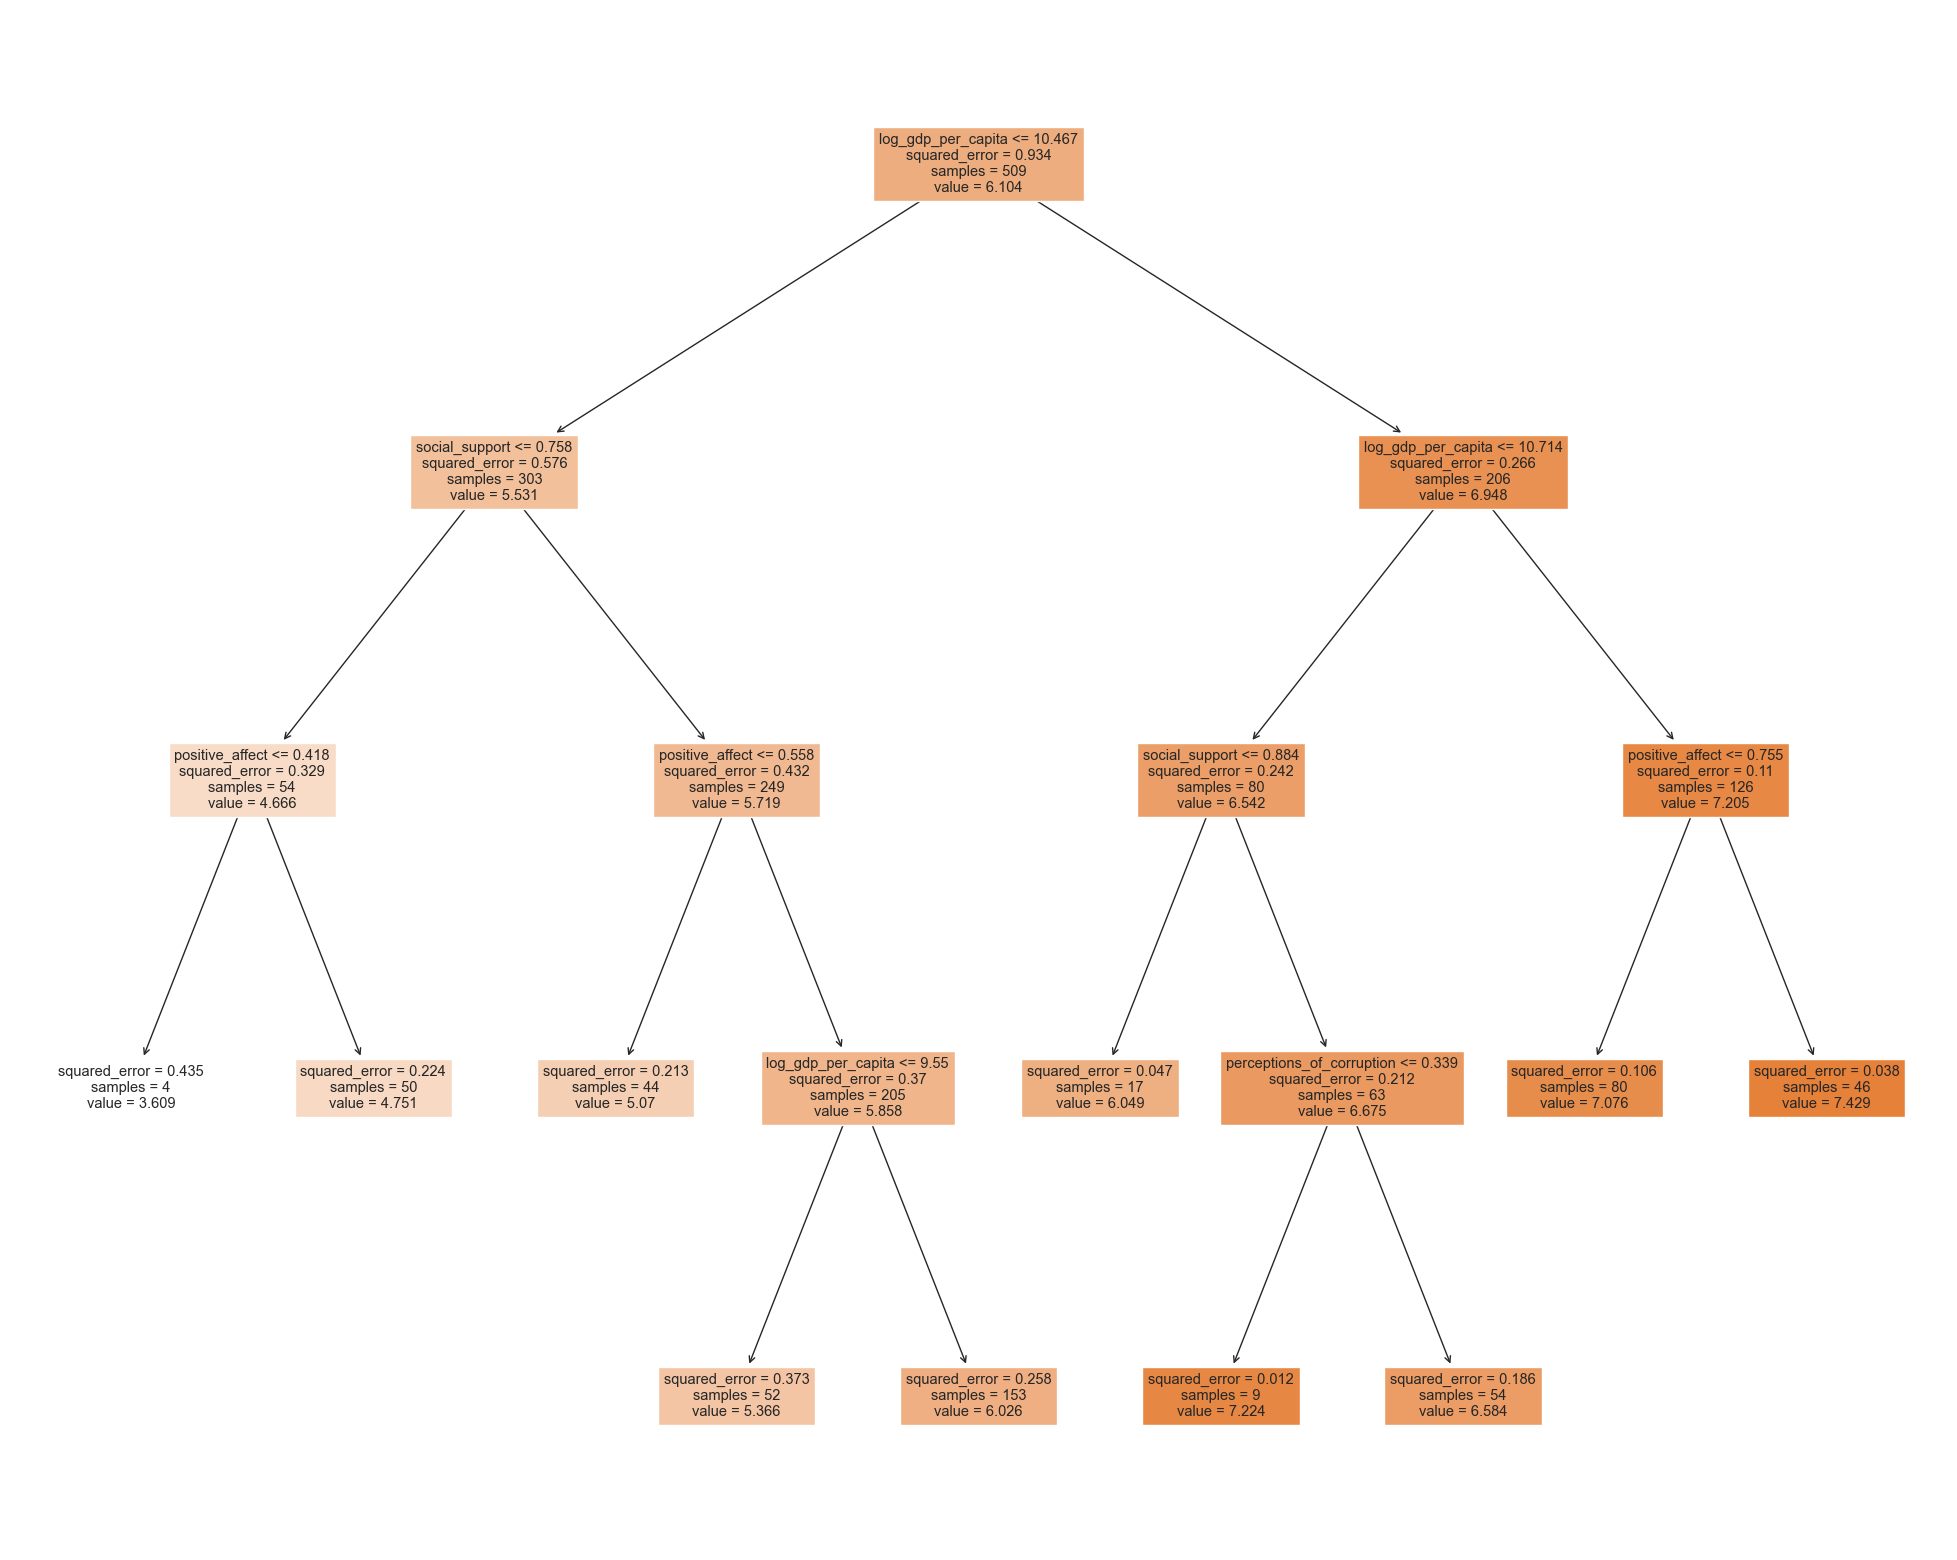

In [28]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [29]:
dectree_error_lst = []
for depth in np.arange(3,5,1):
    for leaf in np.arange(10,21,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True])
#dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
3,model_11_dectree_dep_4_max_leaf_10,0.448,0.782,0.340,0.060,0.509,0.755,0.387,0.072,0.061,0.047,0.027
0,model_11_dectree_dep_3_max_leaf_10,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027
1,model_11_dectree_dep_3_max_leaf_15,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027
2,model_11_dectree_dep_3_max_leaf_20,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027
4,model_11_dectree_dep_4_max_leaf_15,0.429,0.801,0.324,0.057,0.512,0.752,0.385,0.071,0.083,0.061,0.049
5,model_11_dectree_dep_4_max_leaf_20,0.428,0.801,0.322,0.056,0.514,0.750,0.388,0.072,0.086,0.066,0.051


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_33310/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


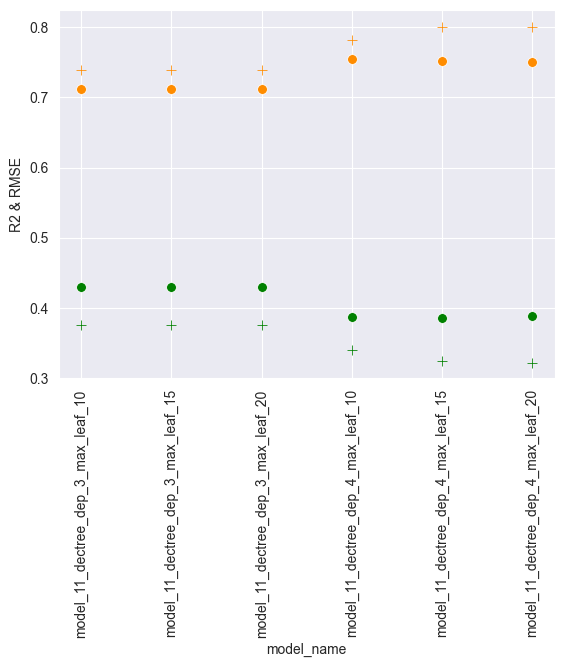

In [30]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

+ It is hard to decide which one is the optimum. But still everything is lower than knn, so we don't have to put so much effort in it.  

part df for the best models:

In [31]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2
3,model_11_dectree_dep_4_max_leaf_10,0.448,0.782,0.340,0.060,0.509,0.755,0.387,0.072,0.061,0.047,0.027
0,model_11_dectree_dep_3_max_leaf_10,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027
1,model_11_dectree_dep_3_max_leaf_15,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027
2,model_11_dectree_dep_3_max_leaf_20,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027
4,model_11_dectree_dep_4_max_leaf_15,0.429,0.801,0.324,0.057,0.512,0.752,0.385,0.071,0.083,0.061,0.049
5,model_11_dectree_dep_4_max_leaf_20,0.428,0.801,0.322,0.056,0.514,0.750,0.388,0.072,0.086,0.066,0.051


Random Forest 

In [32]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 20,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Min number of nodes: 23
Average number of nodes: 30
Max number of nodes: 31
Min maximum depth: 4
Average maximum depth: 4
Max maximum depth: 4
Number of Trees: 100
train_rmse  0.377
train_r2  0.845
train_mae  0.282
train_mape  0.05
test_rmse  0.481
test_r2  0.781
test_mae  0.362
test_mape  0.07


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [33]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [34]:
random_trees_error_lst = []
for tree_depth in np.arange(4,7,1):
    for tree_leaf in np.arange(10,21,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_RMSE':delta_rmse,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
3,model_11_forest_tree_depth5_max_leaf_10,0.395,0.830,0.300,0.053,0.504,0.760,0.377,0.073,0.109,0.077,0.070,19,4,100
1,model_11_forest_tree_depth4_max_leaf_15,0.378,0.845,0.283,0.050,0.482,0.780,0.362,0.070,0.104,0.079,0.065,28,4,100
6,model_11_forest_tree_depth6_max_leaf_10,0.393,0.832,0.298,0.053,0.504,0.760,0.377,0.073,0.111,0.079,0.072,19,4,100
0,model_11_forest_tree_depth4_max_leaf_10,0.400,0.826,0.300,0.053,0.507,0.757,0.379,0.073,0.107,0.079,0.069,19,4,100
2,model_11_forest_tree_depth4_max_leaf_20,0.377,0.845,0.282,0.050,0.481,0.781,0.362,0.070,0.104,0.080,0.064,30,4,100
4,model_11_forest_tree_depth5_max_leaf_15,0.360,0.859,0.271,0.048,0.471,0.790,0.353,0.068,0.111,0.082,0.069,29,5,100
7,model_11_forest_tree_depth6_max_leaf_15,0.354,0.864,0.268,0.047,0.473,0.788,0.353,0.068,0.119,0.085,0.076,29,5,100
5,model_11_forest_tree_depth5_max_leaf_20,0.339,0.875,0.254,0.045,0.455,0.805,0.341,0.065,0.116,0.087,0.070,39,5,100
8,model_11_forest_tree_depth6_max_leaf_20,0.328,0.883,0.249,0.044,0.453,0.806,0.339,0.065,0.125,0.090,0.077,39,5,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_33310/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


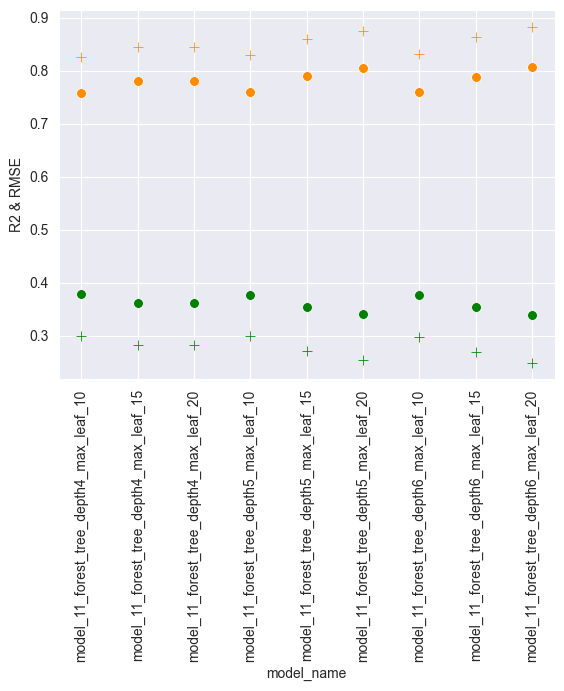

In [35]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Like in the decision tree model max_depth = 3 and max_leaf_node = 8 is the optimum, we can just choose this combination

In [36]:
#part_forest = random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_forest

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
3,model_11_forest_tree_depth5_max_leaf_10,0.395,0.830,0.300,0.053,0.504,0.760,0.377,0.073,0.109,0.077,0.070,19,4,100
1,model_11_forest_tree_depth4_max_leaf_15,0.378,0.845,0.283,0.050,0.482,0.780,0.362,0.070,0.104,0.079,0.065,28,4,100
6,model_11_forest_tree_depth6_max_leaf_10,0.393,0.832,0.298,0.053,0.504,0.760,0.377,0.073,0.111,0.079,0.072,19,4,100
0,model_11_forest_tree_depth4_max_leaf_10,0.400,0.826,0.300,0.053,0.507,0.757,0.379,0.073,0.107,0.079,0.069,19,4,100
2,model_11_forest_tree_depth4_max_leaf_20,0.377,0.845,0.282,0.050,0.481,0.781,0.362,0.070,0.104,0.080,0.064,30,4,100
4,model_11_forest_tree_depth5_max_leaf_15,0.360,0.859,0.271,0.048,0.471,0.790,0.353,0.068,0.111,0.082,0.069,29,5,100


Test: AdaBoostRegressor

In [37]:
ada = AdaBoostRegressor(n_estimators=100, random_state=8)
ada.fit(X_train, y_train)

y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3),
                    'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_R2,delta_MAE
0,model_11_ada_boost,0.362,0.86,0.303,0.052,0.465,0.802,0.367,0.068,0.103,0.058,0.064


that is really nice!!

In [38]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [39]:
gbr = GradientBoostingRegressor(n_estimators=100,
                                criterion= 'squared_error',
                                max_depth = 4, 
                                max_leaf_nodes = 14,
                                random_state=123)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_11_gbr_boost,0.139,0.979,0.383,0.861,0.244,0.118


In [40]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 14,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  

In [41]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_11_lin_reg_1,0.460,0.771,0.330,0.058,0.514,0.750,0.373,0.071,0.054,0.043,0.021,NaN,NaN,NaN
3,model_11_dectree_dep_4_max_leaf_10,0.448,0.782,0.340,0.060,0.509,0.755,0.387,0.072,0.061,0.047,0.027,NaN,NaN,NaN
0,model_11_dectree_dep_3_max_leaf_10,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027,NaN,NaN,NaN
1,model_11_dectree_dep_3_max_leaf_15,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027,NaN,NaN,NaN
2,model_11_dectree_dep_3_max_leaf_20,0.490,0.739,0.375,0.066,0.551,0.712,0.430,0.080,0.061,0.055,0.027,NaN,NaN,NaN
1,model_11_lin_reg_2,0.395,0.830,0.299,0.052,0.477,0.785,0.349,0.065,0.082,0.050,0.045,NaN,NaN,NaN
4,model_11_dectree_dep_4_max_leaf_15,0.429,0.801,0.324,0.057,0.512,0.752,0.385,0.071,0.083,0.061,0.049,NaN,NaN,NaN
5,model_11_dectree_dep_4_max_leaf_20,0.428,0.801,0.322,0.056,0.514,0.750,0.388,0.072,0.086,0.066,0.051,NaN,NaN,NaN
6,model_11_knn_1_40,0.459,0.772,0.337,0.061,0.544,0.720,0.387,0.077,0.085,0.050,0.052,NaN,NaN,NaN
5,model_11_knn_1_35,0.450,0.780,0.331,0.060,0.537,0.727,0.381,0.075,0.087,0.050,0.053,NaN,NaN,NaN


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_33310/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


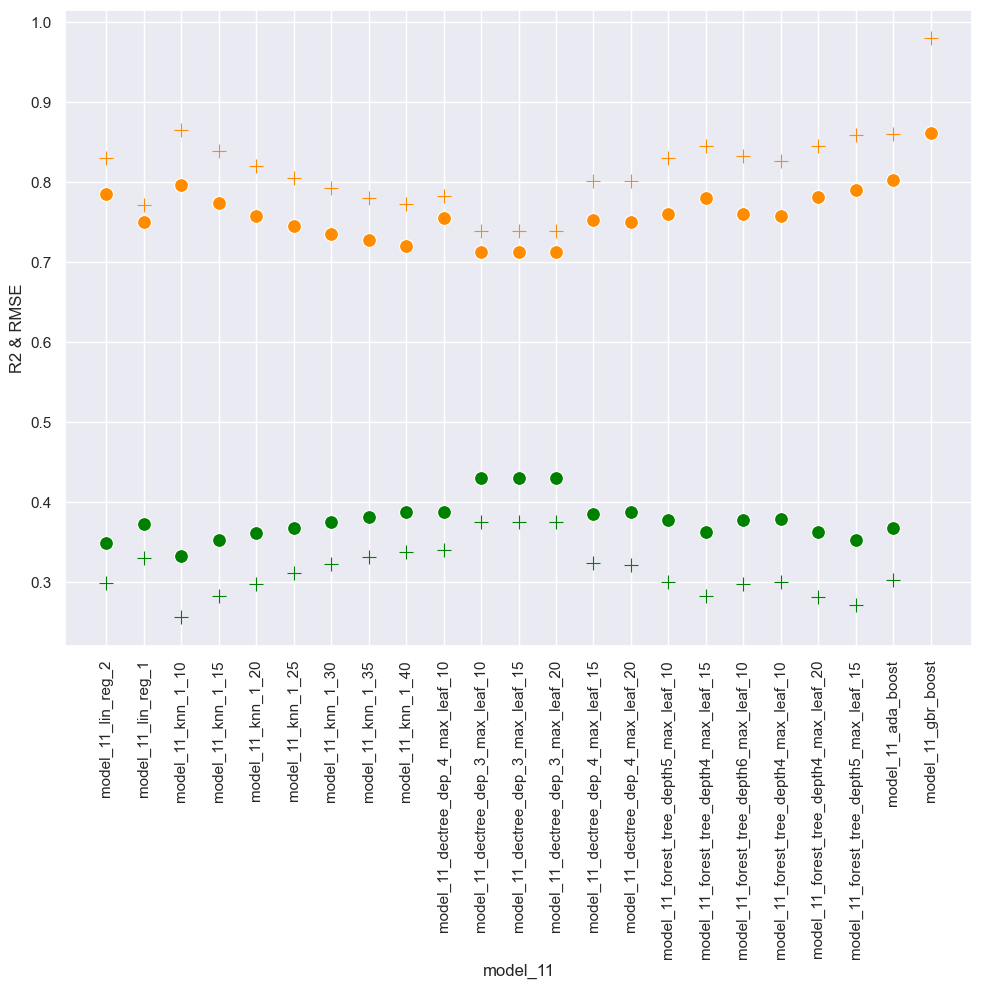

In [42]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [43]:
error_df[error_df['test_mape']==error_df['test_mape'].min()]

,model_name,train_rmse,train_r2,train_mae,train_mape,test_rmse,test_r2,test_mae,test_mape,delta_RMSE,delta_MAE,delta_R2,mean_node_num,mean_depth,num_of_trees
1,model_11_lin_reg_2,0.395,0.830,0.299,0.052,0.477,0.785,0.349,0.065,0.082,0.050,0.045,NaN,NaN,NaN
0,model_11_knn_1_10,0.352,0.865,0.256,0.046,0.465,0.796,0.332,0.065,0.113,0.076,0.069,NaN,NaN,NaN


In [44]:
error_df.to_csv(f'../data/Metrics_Summary_{model_name}.txt', index=False)

In [45]:
et_clf = ExtraTreesRegressor(n_estimators=300)
et_clf = et_clf.fit(X_train, y_train)
feature_importances = et_clf.feature_importances_
fi_lst = []
for idx, i in enumerate(X_train.columns.to_list()):
    fi_lst.append({'feature_name': i, 'feature_importance': feature_importances[idx]})
    #print(i, feature_importances[idx])
feature_df = pd.DataFrame(fi_lst)
feature_df.sort_values('feature_importance')

,feature_name,feature_importance
5,negative_affect,0.042456
6,purchasing_power_index,0.102925
2,healthy_life_expectancy_at_birth,0.113790
4,positive_affect,0.126059
1,social_support,0.148487
3,perceptions_of_corruption,0.183121
0,log_gdp_per_capita,0.283162


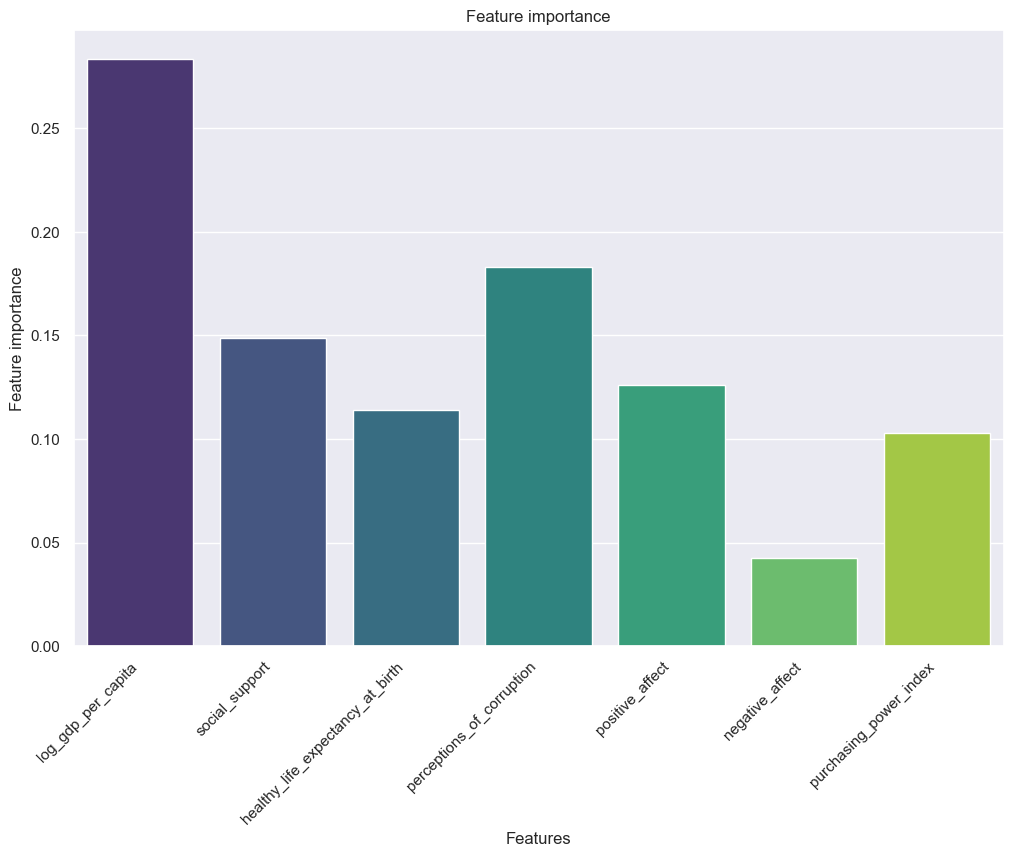

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_df['feature_name'],
            y=feature_df['feature_importance'].sort_values(ascending=False),
            palette="viridis")
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.xticks(rotation=45, ha="right")
plt.show()